In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as pl
from pylab import rcParams
rcParams['figure.figsize'] =  14,10
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

In [9]:
fB = 32e9;	# Velocidad de simbolos (baud rate)
T = 1/fB; # Tiempo entre simbolos
M = 8;  #Factor de sobremuestreo
fs = fB*M;	# Sample rate

beta = .510#; %Factor de roll-off
L = 20;  # 2*L*M+1 es el largo del filtro sobremuestreado
t = np.arange(-L,L,1./M)*T#[-L:1/M:L]*T;
n_delay_filter = L*M# %Retardo del filtro
def gen_filter():
    return [np.sinc(t2/T)*np.cos(np.pi*beta*t2/T)/(1-4*beta**2*t2**2/T**2) for t2 in t];
    
gn=gen_filter()

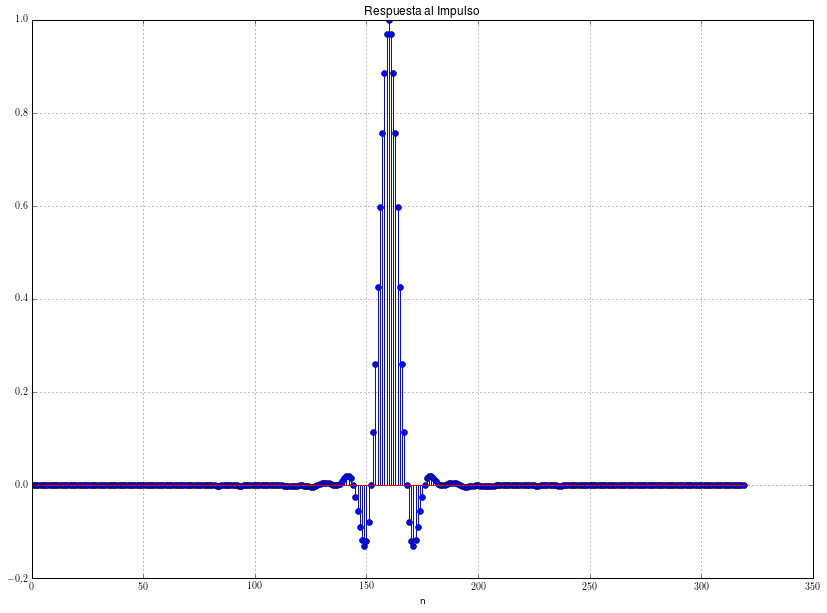

In [10]:
#pl.figure(figsize=(14,10))
pl.stem(gn)
pl.title('Respuesta al Impulso');
pl.xlabel('n');
pl.grid()
pl.draw()

In [11]:
def sweep_omega():
    Omega = np.arange(0,1,1./2**8)*np.pi;
    N = 1000;
    H_Mag=[]                  
    H_Fase=[]
    for omega in Omega:
        xn = [np.exp(np.complex(0,omega*n)) for n in xrange(N)];
        yn = np.convolve(xn,gn);
        H_Mag.append( np.abs(yn[N/2]))
        H_Fase.append(np.angle(yn[N/2]*np.conj(xn[N/2-n_delay_filter])))
    return Omega,H_Mag,H_Fase
Omega,H_Mag,H_Fase=sweep_omega()



In [12]:
def plot_omega():
    pl.subplot(2,1,1)
    pl.plot(Omega/np.pi,H_Mag);
    pl.title('Magnitud');
    pl.ylabel('$\|H\|$')
    pl.xlabel('$\Omega/\pi$');
    pl.grid()
    pl.subplot(2,1,2) 
    pl.plot(Omega/np.pi,H_Fase);
    pl.title('Fase');
    pl.ylabel('angle(H)')
    pl.xlabel('$\Omega/\pi$');
    pl.grid(True)
    pl.draw()


In [13]:
n_symbols = 1000;
ak = 2*np.random.randint(2,size=(1,n_symbols))-1
xn=np.zeros((n_symbols*M))
xn[::M]=ak

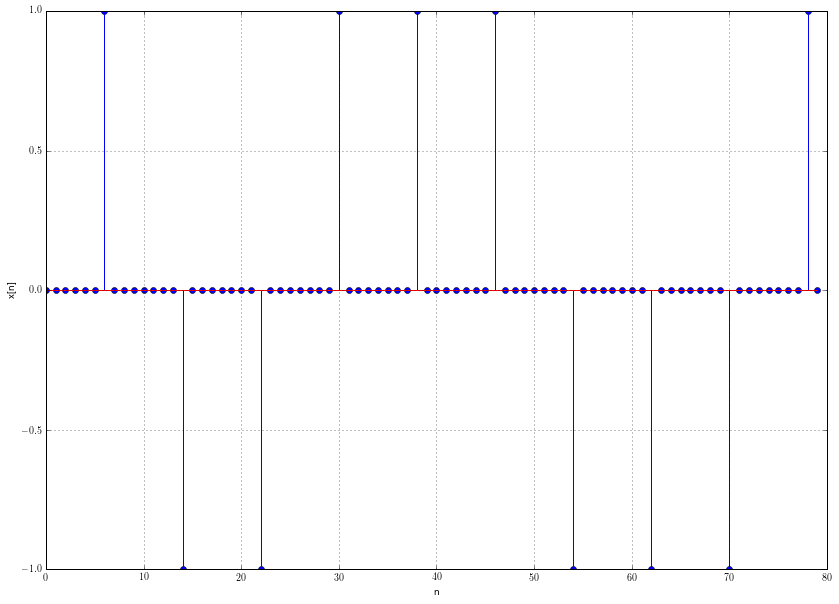

In [14]:
pl.stem(xn[10:10+M*10])

pl.ylabel('x[n]')
pl.xlabel('n');
pl.grid(True)
pl.draw()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in cdouble_scalars


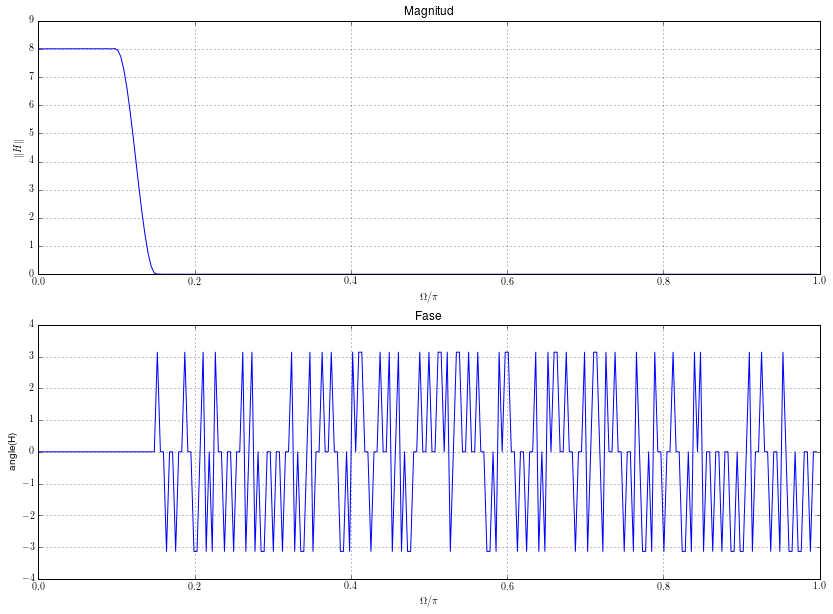

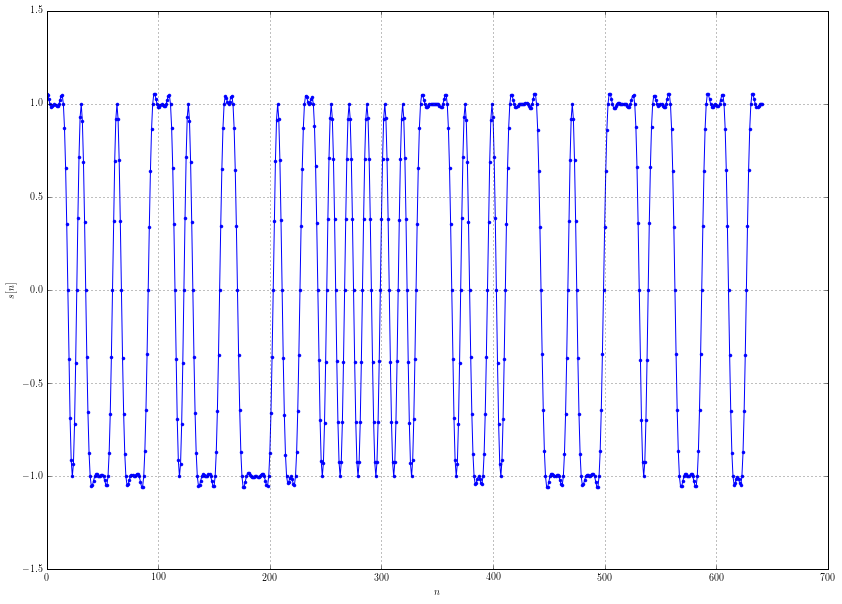

In [20]:
def sn_convolve():
    return np.convolve(xn,gn);
    
def plot_time(sn):
    pl.figure()
    pl.plot(sn[(2*L*M+1):(2*L*M+1)*3],'.-');
    pl.ylabel('$s[n]$')
    pl.xlabel('$n$');
    pl.grid(True)

beta=0.999
sweep_omega()
plot_omega()
gn=gen_filter()
sn=sn_convolve()
plot_time(sn)
pl.draw()

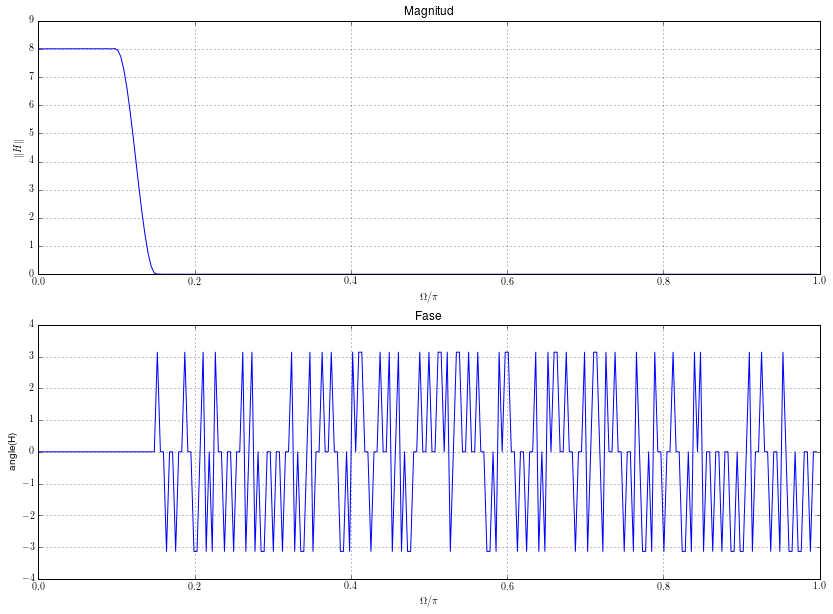

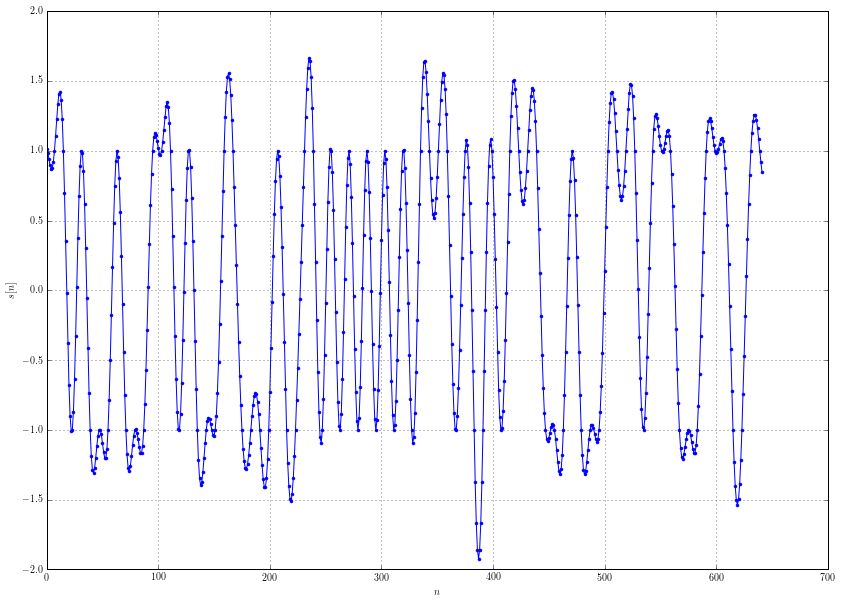

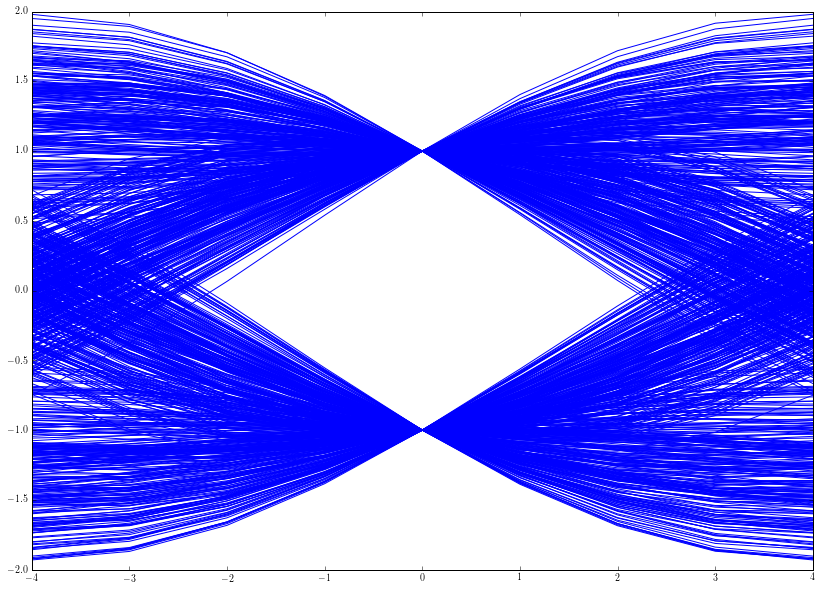

In [17]:
def plot_eye(sn):
    pl.figure()
    d = 5; #Delay para centrar el ojo
    pl.hold(True)
    for m in range( 2*L,n_symbols-(2*L+1)):
        sn_p = sn[m*M+d-1:m*M+d+M];
        pl.plot(range(-M/2,M/2+1),sn_p,'b')
beta=0.205
gn=gen_filter()
sn=sn_convolve()
Omega,H_Mag,H_Fase=sweep_omega()
plot_omega()
plot_time(sn)
plot_eye(sn)
pl.draw()

In [18]:
np.pi/8

0.39269908169872414